In [1]:
import networkx as nx
from smodels.theory.model import Model
from smodels.share.models.mssm import BSMList
from smodels.share.models.SMparticles import SMList
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
from smodels.experiment.finalStateParticles import finalStates
from smodels.theory.auxiliaryFunctions import stringToGraph
import numpy as np
import string

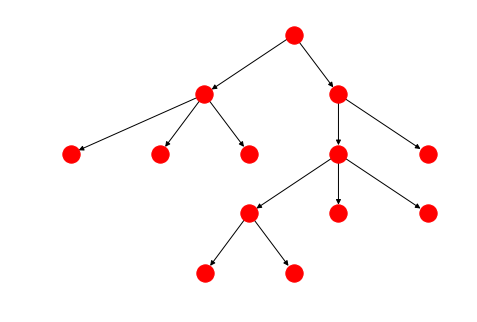

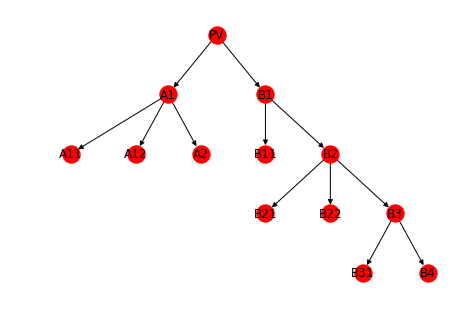

In [2]:
elementStr = "[[['e+','e-']],[['mu-'],['jet','jet'],['L']]]"
gA = stringToGraph(elementStr)

paths = [['pV','X','MET'], ['pV','X','e+'],['pV','X','e-'],
         ['pV','Y','Z','W','MET'],['pV','Y','Z','W','L'],['pV','Y','Z','jetA'],['pV','Y','Z','jetB'],['pV','Y','mu-']]
g,root = nx.prefix_tree(paths)
g.remove_node(root)
for n in g.nodes():
    if g.out_degree[n] == 0:
        g.remove_node(n)
        break
pos =graphviz_layout(g, prog='dot')
nx.draw(g,pos,with_labels=False,arrows=True)
plt.show()
pos =graphviz_layout(gA, prog='dot')
nx.draw(gA,pos,with_labels=True,arrows=True)
plt.show()

In [3]:
for n in g.nodes():
    if g.nodes[n]['source'] in ['X','Y','Z','W']:
        g.nodes[n]['label'] = 'anyOdd'
    elif g.nodes[n]['source'] in ['META','METB']:
        g.nodes[n]['label'] = 'MET'
    elif g.nodes[n]['source'] in ['jetA','jetB']:
        g.nodes[n]['label'] = 'jet'
    else:    
        g.nodes[n]['label'] = g.nodes[n]['source']

In [18]:
def compareNode(n1,n2):
    return  n1['label'].lower() == n2['particle'].label.lower()


nx.isomorphism.is_isomorphic(g,gA,node_match=compareNode)

True

In [19]:
for n in gA.nodes():
    if gA.in_degree[n] == 0:
        print(n,gA.nodes[n]['particle'])

PV PV


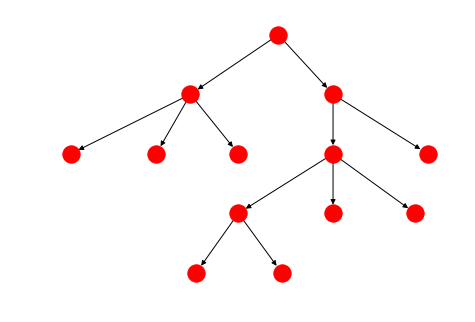

In [20]:
gg = g.copy()
pos =graphviz_layout(gg, prog='dot')
nx.draw(gg,pos,with_labels=False,arrows=True)
plt.show()

In [7]:
gg.number_of_edges()

12

In [10]:
type(gA.nodes['PV'])

dict

In [21]:
DiGM = nx.isomorphism.DiGraphMatcher(g,gA)
DiGMB = nx.isomorphism.DiGraphMatcher(g,gA,node_match=compareNode)

In [22]:
print(DiGM.is_isomorphic())
print(DiGMB.is_isomorphic())

True
True


In [23]:
print(DiGM.mapping)
print(DiGMB.mapping)

{'1ce8f498-e603-11e8-a982-701ce774c138': 'A1', '1ce8f49a-e603-11e8-a982-701ce774c138': 'A11', '1ce8f49b-e603-11e8-a982-701ce774c138': 'A12', '1ce8f499-e603-11e8-a982-701ce774c138': 'A2', '1ce8f497-e603-11e8-a982-701ce774c138': 'PV', '1ce8f49c-e603-11e8-a982-701ce774c138': 'B1', '1ce8f4a3-e603-11e8-a982-701ce774c138': 'B11', '1ce8f49d-e603-11e8-a982-701ce774c138': 'B2', '1ce8f4a1-e603-11e8-a982-701ce774c138': 'B21', '1ce8f4a2-e603-11e8-a982-701ce774c138': 'B22', '1ce8f49e-e603-11e8-a982-701ce774c138': 'B3', '1ce8f4a0-e603-11e8-a982-701ce774c138': 'B31', '1ce8f49f-e603-11e8-a982-701ce774c138': 'B4'}
{'1ce8f498-e603-11e8-a982-701ce774c138': 'A1', '1ce8f49a-e603-11e8-a982-701ce774c138': 'A11', '1ce8f49b-e603-11e8-a982-701ce774c138': 'A12', '1ce8f499-e603-11e8-a982-701ce774c138': 'A2', '1ce8f497-e603-11e8-a982-701ce774c138': 'PV', '1ce8f49c-e603-11e8-a982-701ce774c138': 'B1', '1ce8f4a3-e603-11e8-a982-701ce774c138': 'B11', '1ce8f49d-e603-11e8-a982-701ce774c138': 'B2', '1ce8f4a1-e603-11e8-a98

In [24]:
print(DiGM.mapping == DiGMB.mapping)

True
